## <span style="color:black">Firing Rate and Spike Train Statistics</span>

As you recall form the [Gerstner reading](https://neuronaldynamics.epfl.ch/online/Ch7.html), there are several ways to think about a neuron's firing rate. In the first part of this lab, we will calculate the Fano Factor as well as the Interspike Interval of the neuron.

Note: Because we will be using data from a single neuron, we will omit the population method.

<img src="image1.png" alt="drawing" width="400"/>

The data we will be using was collected from de Ruyter van Stevenick from a blow fly (Calliphora erytrocephela) H1 visual neuron responding to a white noise visual motion stimulus. They recorded the neuron at 500 Hz (in other words, each sample represents 2 ms). Within the file, $rho$ is a boolean vector where 1 denotes a spike and $stim$ is a variable indicating the intensity of the visual stimulus (in this case, the angular velocity of the random moving dots). We will only be using the rho vector today, but we will return to this data set next week.

Run the cell below to load in the data.

In [1]:
# Importing packages to load data
import csv
import numpy as np

# Loading data
with open('rho.csv') as f:
    # storing data to a variable called rho
    rho = list(csv.reader(f))

# Converting the file to an array of floats
rho = np.array(rho[:], dtype=np.float)

The most straightforward method for computing a neuron's firing rate is the **spike count rate**. Here, we simply count the number of spikes and divide by the interval of time:

$$r = \frac{n_{spikes}}{time}$$

Compute the spike count rate in spikes per second (Hz) for the entire duration of the recording.

In [11]:
# your code here
totalTime = (len(rho)*2) / 1000
spikeCountRate = sum(rho) / totalTime
print(spikeCountRate)

[44.6675]


Is this a reasonable characterization of the neuron? Create a vector to represent time (remember that the recording was done at 500 Hz), and plot rho versus time. Label your plot appropriately. In the cell below your code, discuss one limitation of characterizing the firing rate in this way.

Text(0, 0.5, 'Spikes')

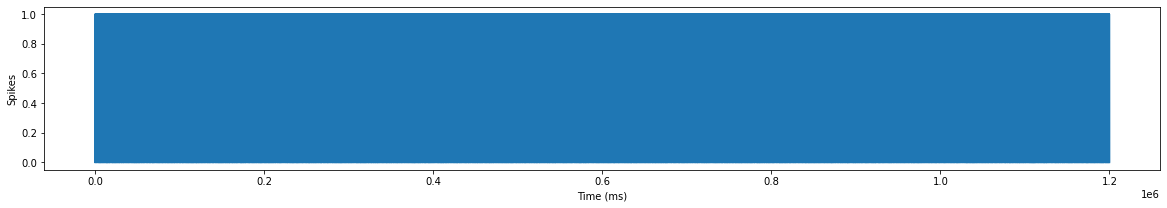

In [17]:
# your code here
time = np.arange(0, 1200000, 2)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot(time, rho)
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")

Text(0, 0.5, 'Spikes')

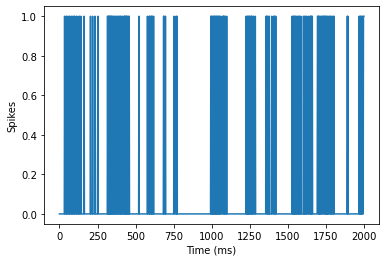

In [18]:
# answer

time = time[0:1000]
rho2 = rho[0:1000]
plt.figure()
plt.plot(time, rho2)
plt.xlabel("Time (ms)")
plt.ylabel("Spikes")

Another way to characterize the neuron's firing pattern is to examine the distribution of interspike intervals (ISI). Unlike the Hodgkin and Huxley model that fired spikes at a constant pace, real neurons have some variability. Calculate the ISI distribution for this dataset, and use the code below to plot the histogram of ISIs. Hint: [**np.where()**](https://numpy.org/doc/stable/reference/generated/numpy.where.html) will be helpful to get these indices. Pro-tip: the array that is returned will be a tuple and you are interested only in its first element.

0.9106650000000001


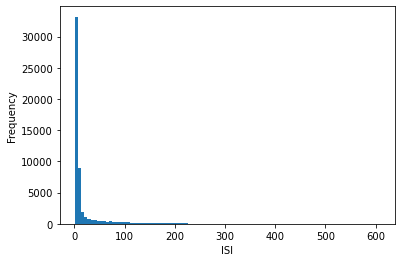

In [25]:
import matplotlib.pyplot as plt

# your code here
spikes = np.where(rho==1)[0]

isi = np.zeros(len(spikes)-1)

for i in range(len(isi)):
    isi[i] = (spikes[i+1] - spikes[i]) * 2


# plot thisInterval in a histogram
plt.figure()
plt.hist(isi,100);
plt.xlabel("ISI")
plt.ylabel("Frequency")

print(np.var(rho)/np.mean(rho))

## Homogeneous Poisson Process

Now, let's compare this actual neuron's firing pattern with a homogeneous Poisson pattern. As you read, this model assumes that the overall firing rate stays the same, but that the locations of the specific spikes are random.

Create a Poisson spike generator that simulates a neuron that spikes at a constant rate of $45 Hz$. Your simulator should sample at $1000 Hz$. Run your simulator for 2000 runs of 1 second each, and record the spikes in a single matrix. Compute the following:
- A histogram of spike count rate
- A histogram of interspike intervals
- Fano factor for spike counts obtained over the 2000 runs.

The code template below will get you started.

0.9550055000000007


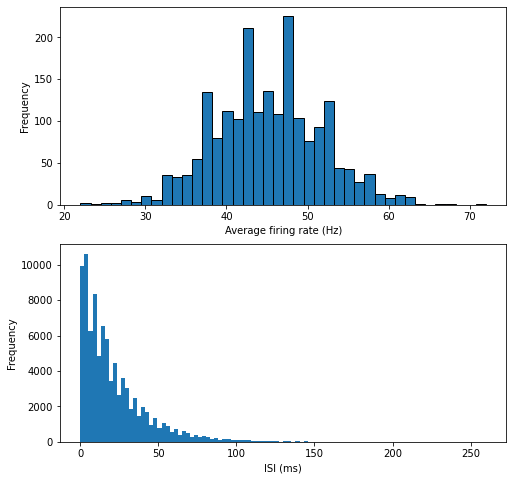

In [26]:
# Define probability of a spike occuring
prob = 45/1000

# Initiate data structure to hold the spikes
spikeMatrix = np.zeros((2000, 1000))

# Create a nested loop to simulate 2000 trials (i) of 1000 samples (j): 
for i in range(2000):
    for j in range(1000):
        # Conditional to assign a spike to spikeMatrix
        if np.random.rand() < prob:
            # Store a 1 in spikeMatrix
            spikeMatrix[i,j] = 1
            
# Calculate number of spikes (hint: we are summing across trials)
spikeCountRates = np.sum(spikeMatrix, axis=1)

# Set up data stuctures: (hint: find total number of spikes first)
totalSpikes = int(np.sum(spikeMatrix, axis=None))
isi = np.zeros(totalSpikes - 1)


# initialize spike counter
counter = -1

# Create a loop through trials that finds the spikes in spikeMatrix
for i in range(2000):
    # Find indices of spikes
    spikes = np.where(spikeMatrix[i,:]==1)[0]
    
    for j in range(len(spikes)-1):
        # Increment counter
        counter += 1
        # Calculate ISI and store in vector
        isi[counter] = (spikes[j+1]-spikes[j])

# Plotting
plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.hist(spikeCountRates,40,edgecolor='black');
plt.xlabel("Average firing rate (Hz)")
plt.ylabel("Frequency")
plt.subplot(2,1,2)
plt.hist(isi,100);
plt.xlabel("ISI (ms)")
plt.ylabel("Frequency")

# Calculate Fano factor
Fano = np.var(spikeMatrix) / np.mean(spikeMatrix)
print(Fano)

Great work today! Please submit this on Lyceum for grading.